In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

1. EDA untuk menganalisis data mentah.

In [6]:
df = pd.read_csv(r"D:\Bootcamp NLP\final_project\datasets\raw_data.csv")

In [7]:
df.info

<bound method DataFrame.info of       id                                               text
0      1             isi bensin motor. lupa brp, kira2 20rb
1      2                       famima ksk 16000, bento 18rb
2      3              lupa nyatet, kemarin makan ramen 45rb
3      4                                     Jajan kopi 20k
4      5                            Beli kuota internet 50k
..   ...                                                ...
317  318     sedangkan buat kebutuhan lain butuh 3.000.000 
318  319                        kemarin aku makan bakmi 50k
319  320  19 desember beli minuman creme brule enak tapi...
320  321                                     beli mixue 16k
321  322  di batavia pik pegel bagus tapi mahal makan aj...

[322 rows x 2 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      322 non-null    int64 
 1   text    322 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [9]:
df.isnull().sum()

id      0
text    0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
317    False
318    False
319    False
320    False
321    False
Length: 322, dtype: bool

In [11]:
df["char_len"] = df["text"].astype(str).apply(len)
df["token_len"] = df["text"].astype(str).apply(lambda x: len(x.split()))
df[["char_len", "token_len"]].describe()

,char_len,token_len
count,322.000000,322.000000
mean,39.242236,6.900621
std,14.287557,2.390805
min,7.000000,2.000000
25%,28.000000,5.000000
50%,38.000000,7.000000
75%,52.000000,9.000000
max,70.000000,15.000000


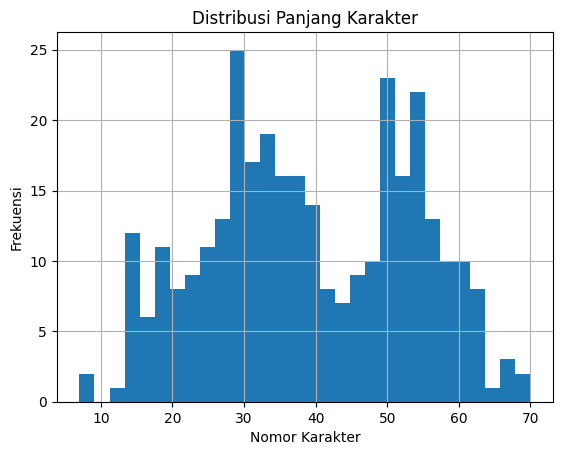

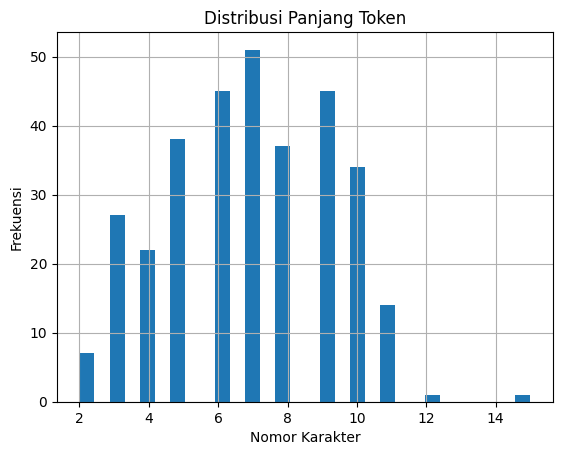

In [12]:
#cek spike karakter kalimat

plt.figure()
df["char_len"].hist(bins=30)
plt.title("Distribusi Panjang Karakter")
plt.xlabel("Nomor Karakter")
plt.ylabel("Frekuensi")
plt.show()

plt.figure()
df["token_len"].hist(bins=30)
plt.title("Distribusi Panjang Token")
plt.xlabel("Nomor Karakter")
plt.ylabel("Frekuensi")
plt.show()

In [13]:
df.columns

Index(['id', 'text', 'char_len', 'token_len'], dtype='object')

In [14]:
df.sort_values("char_len", ascending=False).head(5)
df.sort_values("char_len").head(5)

,id,text,char_len,token_len
79,80,Thr 1jt,7,2
67,68,Warteg 40,9,2
11,12,skincare 100k,13,2
44,45,Indomie: 3.500,14,2
64,65,laundry 50.000,14,2


2. EDA untuk menganalisis data hasil yang sudah dites

In [15]:
df_test = pd.read_csv(r"D:\Bootcamp NLP\final_project\datasets\edge_test_result_v2.csv")

In [16]:
df_test.info

<bound method DataFrame.info of       id  ... normalized
0      1  ...    20000.0
1      2  ...    18000.0
2      3  ...    45000.0
3      4  ...    20000.0
4      5  ...    50000.0
..   ...  ...        ...
316  318  ...  3000000.0
317  319  ...    50000.0
318  320  ...        NaN
319  321  ...    16000.0
320  322  ...   200000.0

[321 rows x 8 columns]>

In [17]:
df_test.info()
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          321 non-null    int64  
 1   text        321 non-null    object 
 2   status      321 non-null    object 
 3   flags       177 non-null    object 
 4   rule        321 non-null    object 
 5   amount      229 non-null    float64
 6   currency    321 non-null    object 
 7   normalized  229 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.2+ KB


id              0
text            0
status          0
flags         144
rule            0
amount         92
currency        0
normalized     92
dtype: int64

In [18]:
df_test["rule"].value_counts()

rule
R5    144
R1     93
R2     72
R3     10
R4      2
Name: count, dtype: int64

In [19]:
df_test["char_len"] = df_test["text"].astype(str).apply(len)
df_test.groupby("rule")["char_len"].describe()

,count,mean,std,min,25%,50%,75%,max
rule,,,,,,,,
R1,93.0,54.322581,8.876154,9.0,52.00,55.0,59.00,70.0
R2,72.0,42.402778,9.189185,17.0,38.00,43.0,50.00,59.0
R3,10.0,36.100000,17.387416,14.0,25.25,33.0,40.75,66.0
R4,2.0,33.000000,9.899495,26.0,29.50,33.0,36.50,40.0
R5,144.0,28.256944,8.372237,7.0,22.00,29.0,34.00,54.0


In [20]:
df_test["flags"].str.split("|").explode().value_counts()

flags
missing_amount         93
multiple_categories    72
calculation            22
non_plus_operator      14
estimation              1
round_trip              1
Name: count, dtype: int64

In [21]:
pd.crosstab (df_test["rule"], df_test["flags"])

flags,calculation,calculation|non_plus_operator,missing_amount,multiple_categories,multiple_categories|calculation,multiple_categories|calculation|non_plus_operator,multiple_categories|estimation,multiple_categories|non_plus_operator,multiple_categories|non_plus_operator|round_trip,non_plus_operator
rule,,,,,,,,,,
R1,0,0,93,0,0,0,0,0,0,0
R2,0,0,0,52,15,1,1,2,1,0
R3,0,4,0,0,0,0,0,0,0,6
R4,2,0,0,0,0,0,0,0,0,0


In [22]:
df_test["amount"].describe()

count    2.290000e+02
mean     2.334069e+05
std      5.903002e+05
min      2.000000e+03
25%      3.200000e+04
50%      6.100000e+04
75%      1.230000e+05
max      3.500000e+06
Name: amount, dtype: float64

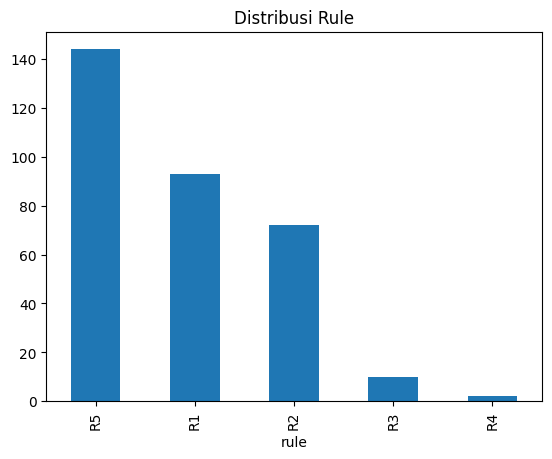

In [23]:
df_test["rule"].value_counts().plot(kind="bar")
plt.title("Distribusi Rule")
plt.show()

3. Merge Two Dataframes (data mentah & data hasil test)

In [24]:
df_join = df.merge(df_test, on="id", how="left")

In [25]:
df_join["normalized"].isna().mean()
df_join["status"].value_counts()
df_join.groupby("rule").size()

rule
R1     93
R2     72
R3     10
R4      2
R5    144
dtype: int64

In [26]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          322 non-null    int64  
 1   text_x      322 non-null    object 
 2   char_len_x  322 non-null    int64  
 3   token_len   322 non-null    int64  
 4   text_y      321 non-null    object 
 5   status      321 non-null    object 
 6   flags       177 non-null    object 
 7   rule        321 non-null    object 
 8   amount      229 non-null    float64
 9   currency    321 non-null    object 
 10  normalized  229 non-null    float64
 11  char_len_y  321 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 30.3+ KB


In [27]:
(df_join["text_x"] == df_join["text_y"]).value_counts()

True     321
False      1
Name: count, dtype: int64

In [28]:
df_join = (
    df_join
    .drop(columns=["text_y"])
    .rename(columns={"text_x": "text"})
)

In [29]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          322 non-null    int64  
 1   text        322 non-null    object 
 2   char_len_x  322 non-null    int64  
 3   token_len   322 non-null    int64  
 4   status      321 non-null    object 
 5   flags       177 non-null    object 
 6   rule        321 non-null    object 
 7   amount      229 non-null    float64
 8   currency    321 non-null    object 
 9   normalized  229 non-null    float64
 10  char_len_y  321 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 27.8+ KB


In [30]:
df_join["status"].value_counts()

status
ok           144
rejected      93
ambiguous     84
Name: count, dtype: int64

In [31]:
df_join[df_join["status"] == "ok"]["flags"].isna().all()

np.True_

In [32]:
df_join["flags"] = df_join["flags"].apply(
    lambda x: [] if pd.isna(x) else x   
)

In [33]:
df_join[["amount", "normalized"]].head(10)

,amount,normalized
0,20000.0,20000.0
1,18000.0,18000.0
2,45000.0,45000.0
3,20000.0,20000.0
4,50000.0,50000.0
5,15000.0,15000.0
6,663000.0,663000.0
7,268664.0,268664.0
8,19500.0,19500.0
9,68000.0,68000.0


In [34]:
df_join.groupby("rule")["normalized"].describe()

,count,mean,std,min,25%,50%,75%,max
rule,,,,,,,,
R1,1.0,3.200000e+04,NaN,32000.0,32000.0,32000.0,32000.0,32000.0
R2,72.0,1.353125e+05,3.341793e+05,15000.0,32000.0,79500.0,123000.0,2500000.0
R3,10.0,1.106400e+06,1.547734e+06,5000.0,69750.0,250000.0,2350000.0,3500000.0
R4,2.0,8.500000e+03,9.192388e+03,2000.0,5250.0,8500.0,11750.0,15000.0
R5,144.0,2.263519e+05,5.386874e+05,3000.0,32750.0,56000.0,116250.0,3000000.0


In [35]:
pd.crosstab(df_join["status"], df_join["rule"], normalize="index")

rule,R1,R2,R3,R4,R5
status,,,,,
ambiguous,0.0,0.857143,0.119048,0.02381,0.0
ok,0.0,0.000000,0.000000,0.00000,1.0
rejected,1.0,0.000000,0.000000,0.00000,0.0


In [36]:
df_join.explode("flags").groupby("flags")["status"].value_counts(normalize=True)

flags                                              status   
calculation                                        ambiguous    1.0
calculation|non_plus_operator                      ambiguous    1.0
missing_amount                                     rejected     1.0
multiple_categories                                ambiguous    1.0
multiple_categories|calculation                    ambiguous    1.0
multiple_categories|calculation|non_plus_operator  ambiguous    1.0
multiple_categories|estimation                     ambiguous    1.0
multiple_categories|non_plus_operator              ambiguous    1.0
multiple_categories|non_plus_operator|round_trip   ambiguous    1.0
non_plus_operator                                  ambiguous    1.0
Name: proportion, dtype: float64

In [37]:
df_join["char_len"] = df_join["text"].astype(str).apply(len)

In [38]:
df_join.nlargest(5, "char_len")[["text", "rule", "status"]]
df_join.nsmallest(5,"char_len")[["text", "rule", "status"]]

,text,rule,status
79,Thr 1jt,R5,ok
67,Warteg 40,R1,rejected
11,skincare 100k,R5,ok
3,Jajan kopi 20k,R5,ok
44,Indomie: 3.500,R5,ok


In [39]:
df_join[df_join["normalized"].isna()][["text", "rule", "status"]].head(10)

,text,rule,status
46,nabung 5rts ribu,R1,rejected
67,Warteg 40,R1,rejected
78,"bayar tol, lupa nominalnya",R1,rejected
80,"gue abis beli teh tarik, bayar enam tiga ribu.",R1,rejected
81,"saya pesen martabak barusan, harganya delapan ...",R1,rejected
82,Barusan aku ngemil martabak seharga lima puluh...,R1,rejected
83,"tadi gue abis ngemil soto, bayar empat delapan...",R1,rejected
84,"tadi pesen bakso barusan, harganya dua puluh t...",R1,rejected
85,"aku tadi pesen nasi goreng barusan, harganya l...",R1,rejected
86,"gue pesen ayam geprek barusan, harganya tiga p...",R1,rejected


4. Text Preprocessing

In [40]:
#final text source

TEXT_COL = "text"
LABEL_COL = "rule"

In [41]:
import re

def text_cleaning(text: str) -> str:
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

In [42]:
df_join["text_clean"] = df_join[TEXT_COL].astype(str).apply(text_cleaning)

In [43]:
df_join[["text", "text_clean"]].head(5)

,text,text_clean
0,"isi bensin motor. lupa brp, kira2 20rb","isi bensin motor. lupa brp, kira2 20rb"
1,"famima ksk 16000, bento 18rb","famima ksk 16000, bento 18rb"
2,"lupa nyatet, kemarin makan ramen 45rb","lupa nyatet, kemarin makan ramen 45rb"
3,Jajan kopi 20k,jajan kopi 20k
4,Beli kuota internet 50k,beli kuota internet 50k


In [44]:
df_model = df_join.copy()

In [45]:
df_model["rule_model"] = df_model["rule"].replace(
    {
        "R4":"R3"
    }
)

df_model = df_model.dropna(subset=["rule_model", "text_clean"])

In [46]:
df_model["rule_model"].value_counts()

rule_model
R5    144
R1     93
R2     72
R3     12
Name: count, dtype: int64

In [47]:
def simple_tokenize(text: str):
    return text.split()

In [48]:
df_model["tokens"] = df_model["text_clean"].apply(simple_tokenize)

In [49]:
df_model[["text_clean", "tokens"]].head(3)

,text_clean,tokens
0,"isi bensin motor. lupa brp, kira2 20rb","[isi, bensin, motor., lupa, brp,, kira2, 20rb]"
1,"famima ksk 16000, bento 18rb","[famima, ksk, 16000,, bento, 18rb]"
2,"lupa nyatet, kemarin makan ramen 45rb","[lupa, nyatet,, kemarin, makan, ramen, 45rb]"


5. Modeling

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    tokenizer=simple_tokenize,
    lowercase=False,
    min_df=2,
    ngram_range=(1,2)
)

X = vectorizer.fit_transform(df_model["text_clean"])
y = df_model["rule_model"]

c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
X.shape

(321, 450)

In [52]:
len(vectorizer.get_feature_names_out())

450

In [53]:
df_model["text_clean"].isna().sum()
df_model["rule_model"].isna().sum()

np.int64(0)

In [54]:
df_model["rule_model"].value_counts()
df_model["rule_model"].value_counts(normalize=True)

rule_model
R5    0.448598
R1    0.289720
R2    0.224299
R3    0.037383
Name: proportion, dtype: float64

In [59]:
#split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:

#train model
from sklearn.linear_model import LogisticRegression

unbalanced_model = LogisticRegression(
    max_iter=1000
)

unbalanced_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [61]:
balanced_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

balanced_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
import joblib

smote_pipeline = ImbPipeline([
    ("smote", SMOTE()),
    ("model", LogisticRegression(class_weight="balanced", max_iter=1000))
])

smote_pipeline.fit(X_train, y_train)

,steps,"[('smote', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,None
,k_neighbors,5
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [64]:
#test model
from sklearn.metrics import classification_report

y_pred_unbalanced = unbalanced_model.predict(X_test)
print("=== Unbalanced Model ===")
print(classification_report(y_test, y_pred_unbalanced))

y_pred_balanced = balanced_model.predict(X_test)
print("=== Balanced Model ===")
print(classification_report(y_test, y_pred_balanced))

y_pred_smote = smote_pipeline.predict(X_test)
print("=== SMOTE Model ===")
print(classification_report(y_test, y_pred_smote))

=== Unbalanced Model ===
              precision    recall  f1-score   support

          R1       1.00      0.89      0.94        19
          R2       0.83      0.67      0.74        15
          R3       0.00      0.00      0.00         2
          R5       0.75      0.93      0.83        29

    accuracy                           0.83        65
   macro avg       0.65      0.62      0.63        65
weighted avg       0.82      0.83      0.82        65

=== Balanced Model ===
              precision    recall  f1-score   support

          R1       1.00      0.89      0.94        19
          R2       0.79      0.73      0.76        15
          R3       0.17      0.50      0.25         2
          R5       0.82      0.79      0.81        29

    accuracy                           0.80        65
   macro avg       0.69      0.73      0.69        65
weighted avg       0.85      0.80      0.82        65

=== SMOTE Model ===
              precision    recall  f1-score   support

       

c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

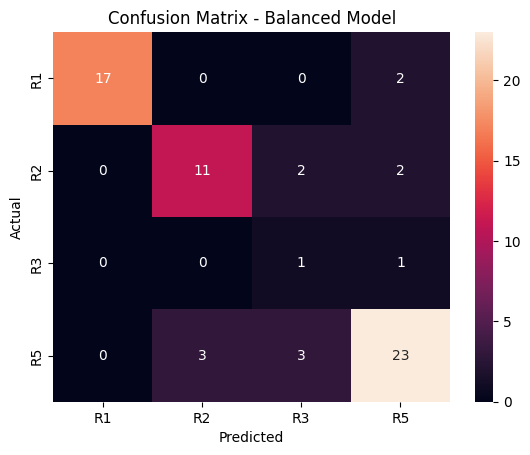

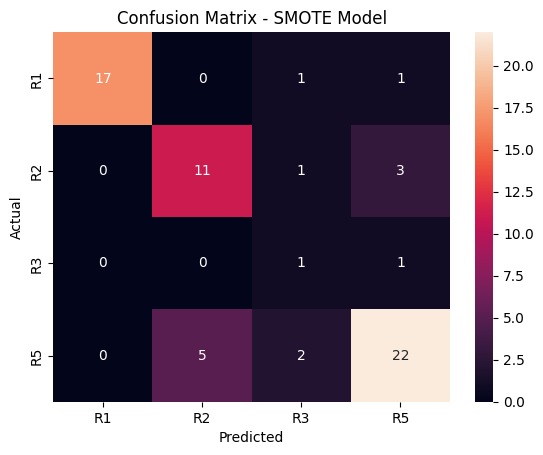

In [65]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=balanced_model.classes_,
            yticklabels=balanced_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Model")
plt.show()

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=smote_pipeline["model"].classes_,
            yticklabels=smote_pipeline["model"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SMOTE Model")
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(balanced_model, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Macro CV:", scores)
print("Average:", scores.mean())

scores = cross_val_score(smote_pipeline, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Macro CV SMOTE:", scores)
print("Average:", scores.mean())

F1 Macro CV: [0.85435664 0.83095238 0.89691291 0.7455201  0.67824074]
Average: 0.8011965524483469
F1 Macro CV SMOTE: [0.72204503 0.6370614  0.66723181 0.72648032 0.64419603]
Average: 0.6794029184210875


In [68]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

models = [
    ("Unbalanced", unbalanced_model),
    ("Balanced", balanced_model),
    ("SMOTE", smote_pipeline)
]

# Tabel evaluasi lengkap
for name, model in models:
    print(f"\n=== {name} Model ===")
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print table rapi
    for cls in model.classes_:
        precision = report[cls]["precision"]
        recall = report[cls]["recall"]
        f1 = report[cls]["f1-score"]
        support = report[cls]["support"]
        print(f"{cls}: Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}, Support={support}")
    
    # Macro & weighted avg
    print(f"Macro avg: Precision={report['macro avg']['precision']:.2f}, Recall={report['macro avg']['recall']:.2f}, F1={report['macro avg']['f1-score']:.2f}")
    print(f"Weighted avg: Precision={report['weighted avg']['precision']:.2f}, Recall={report['weighted avg']['recall']:.2f}, F1={report['weighted avg']['f1-score']:.2f}")
    
    # Cross-validation F1-macro
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"F1 Macro CV: {cv_scores}")
    print(f"Average CV F1 Macro: {cv_scores.mean():.2f}")



=== Unbalanced Model ===
R1: Precision=1.00, Recall=0.89, F1=0.94, Support=19.0
R2: Precision=0.83, Recall=0.67, F1=0.74, Support=15.0
R3: Precision=0.00, Recall=0.00, F1=0.00, Support=2.0
R5: Precision=0.75, Recall=0.93, F1=0.83, Support=29.0
Macro avg: Precision=0.65, Recall=0.62, F1=0.63
Weighted avg: Precision=0.82, Recall=0.83, F1=0.82
F1 Macro CV: [0.68977591 0.88666667 0.70947455 0.84682149 0.69350366]
Average CV F1 Macro: 0.77

=== Balanced Model ===
R1: Precision=1.00, Recall=0.89, F1=0.94, Support=19.0
R2: Precision=0.79, Recall=0.73, F1=0.76, Support=15.0
R3: Precision=0.17, Recall=0.50, F1=0.25, Support=2.0
R5: Precision=0.82, Recall=0.79, F1=0.81, Support=29.0
Macro avg: Precision=0.69, Recall=0.73, F1=0.69
Weighted avg: Precision=0.85, Recall=0.80, F1=0.82


c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dedes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

F1 Macro CV: [0.85435664 0.83095238 0.89691291 0.7455201  0.67824074]
Average CV F1 Macro: 0.80

=== SMOTE Model ===
R1: Precision=1.00, Recall=0.89, F1=0.94, Support=19.0
R2: Precision=0.69, Recall=0.73, F1=0.71, Support=15.0
R3: Precision=0.20, Recall=0.50, F1=0.29, Support=2.0
R5: Precision=0.81, Recall=0.76, F1=0.79, Support=29.0
Macro avg: Precision=0.68, Recall=0.72, F1=0.68
Weighted avg: Precision=0.82, Recall=0.78, F1=0.80
F1 Macro CV: [0.70489927 0.60138889 0.67919982 0.708895   0.60827649]
Average CV F1 Macro: 0.66


In [72]:
#simpan all model or pipeline

joblib.dump(unbalanced_model, "unbalanced_model.pkl")
joblib.dump(balanced_model, "balanced_model.pkl")
joblib.dump(smote_pipeline, "smote_pipeline.pkl")

balanced_model = joblib.load("balanced_model.pkl")
sample = X_test[0:1]
y_pred = balanced_model.predict(sample)
print(y_pred)

['R5']


6. Model Deployment (by Kak Daffa)